In [1]:
from datasets import load_dataset
import pandas as pd


In [2]:
ds = load_dataset("Geoweaver/ozone_training_data", split="train")

df = ds.to_pandas()
df = df.drop(columns=["StationID"])


In [3]:
# Display dataset info
print(ds)


Dataset({
    features: ['StationID', 'Latitude_x', 'Longitude_x', 'AirNOW_O3', 'Lat_airnow', 'Lon_airnow', 'Lat_cmaq', 'Lon_cmaq', 'Latitude_y', 'Longitude_y', 'CMAQ12KM_O3(ppb)', 'CMAQ12KM_NO2(ppb)', 'CMAQ12KM_CO(ppm)', 'CMAQ_OC(ug/m3)', 'PRSFC(Pa)', 'PBL(m)', 'TEMP2(K)', 'WSPD10(m/s)', 'WDIR10(degree)', 'RGRND(W/m2)', 'CFRAC', 'month', 'day', 'hours'],
    num_rows: 9286860
})


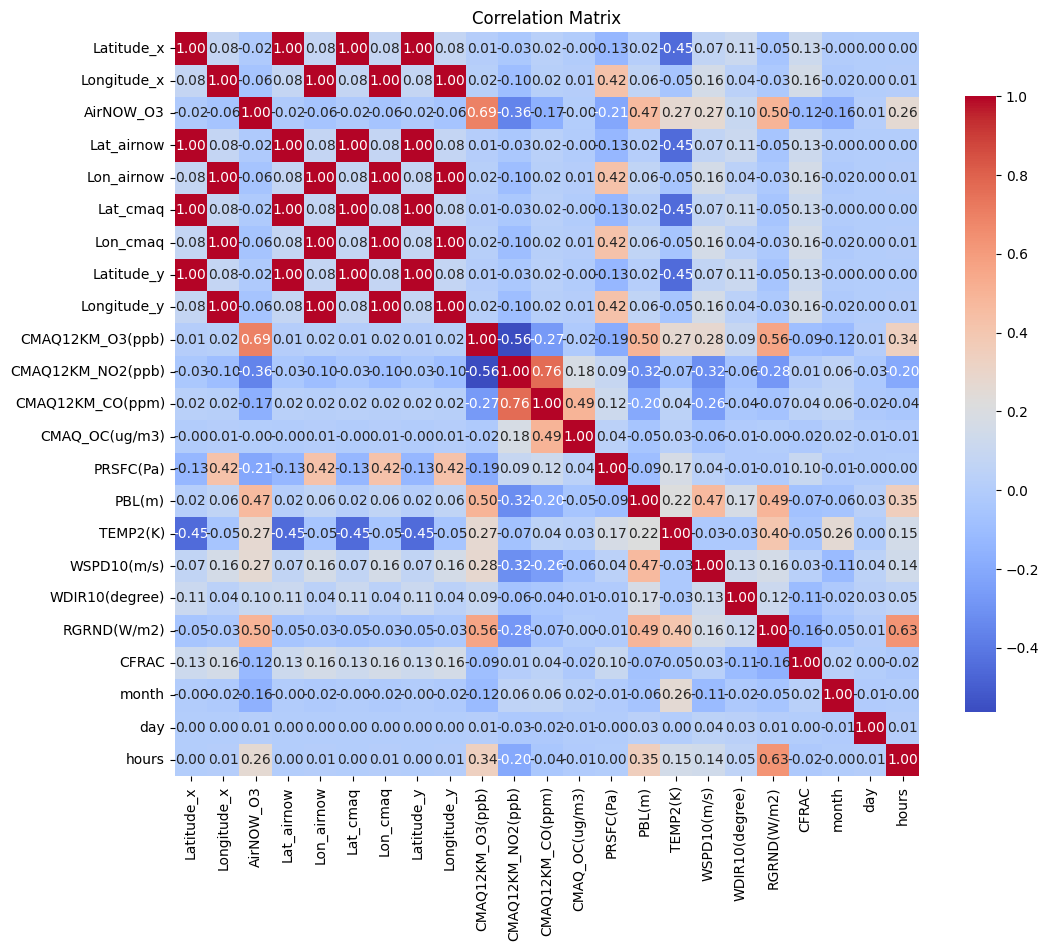

In [4]:
# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()



Columns dropped: {'Longitude_y', 'Lon_airnow', 'Latitude_y', 'Lon_cmaq', 'Lat_airnow', 'Lat_cmaq'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286860 entries, 0 to 9286859
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Latitude_x         float64
 1   Longitude_x        float64
 2   AirNOW_O3          float64
 3   CMAQ12KM_O3(ppb)   float64
 4   CMAQ12KM_NO2(ppb)  float64
 5   CMAQ12KM_CO(ppm)   float64
 6   CMAQ_OC(ug/m3)     float64
 7   PRSFC(Pa)          float64
 8   PBL(m)             float64
 9   TEMP2(K)           float64
 10  WSPD10(m/s)        float64
 11  WDIR10(degree)     float64
 12  RGRND(W/m2)        float64
 13  CFRAC              float64
 14  month              int64  
 15  day                int64  
 16  hours              int64  
dtypes: float64(14), int64(3)
memory usage: 1.2 GB
None


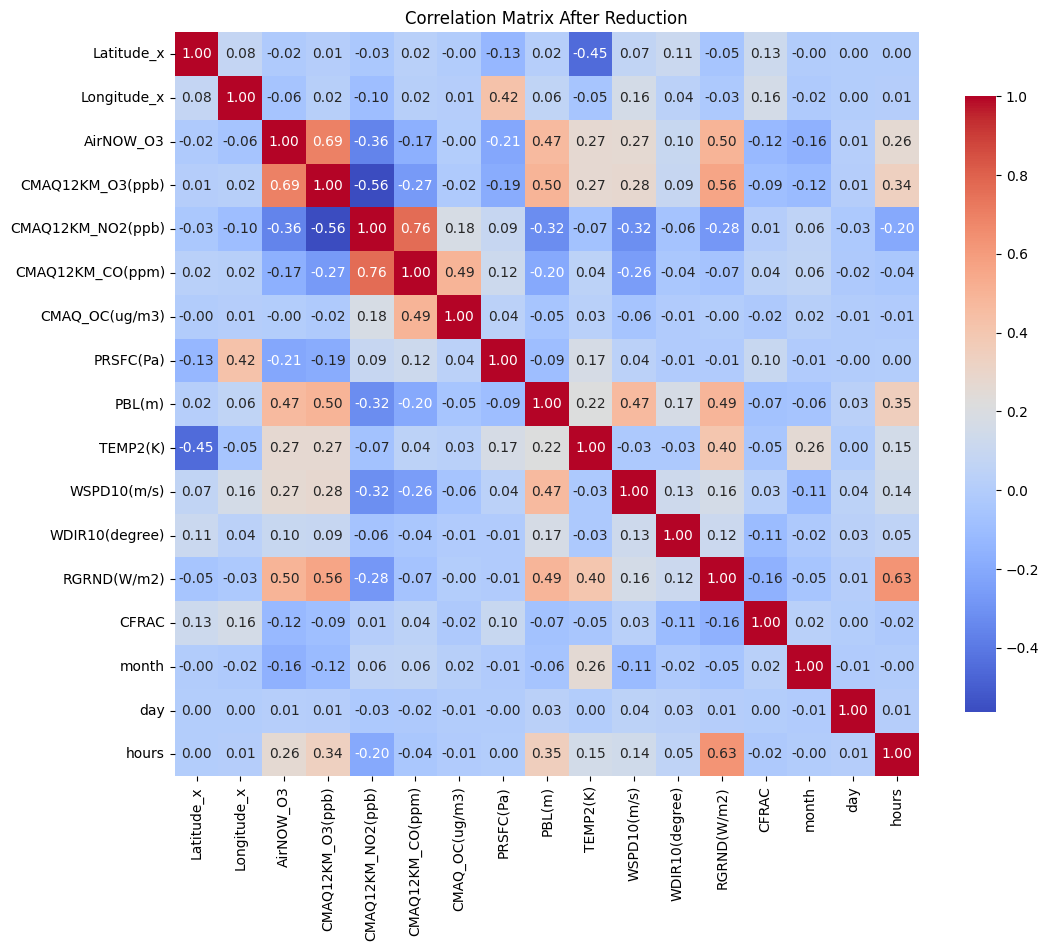

In [5]:
# Delete the most correlated columns
threshold = 0.9

# Find columns to drop
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
            
            
# Drop the columns
df = df.drop(columns=to_drop)
print(f"Columns dropped: {to_drop}")

# Display the reduced dataset info
print(df.info())

# Plot the correlation matrix of the reduced dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix After Reduction")
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["WSPD10(m/s)"])
y = df["WSPD10(m/s)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Make the datasets compatible with the model
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(pd.DataFrame(train_df))
test_dataset = Dataset.from_pandas(pd.DataFrame(test_df))

unified_ds = DatasetDict({
    "train": train_dataset,
    "test": test_dataset,
})

# Save the datasets to hub
unified_ds.push_to_hub("ikkiren/bigdata_ds", private=True)


Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2477 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2477 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2477 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1858 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ikkiren/bigdata_ds/commit/30a9009a863f21239a69de9fb41ccaa7bf94f07e', commit_message='Upload dataset', commit_description='', oid='30a9009a863f21239a69de9fb41ccaa7bf94f07e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ikkiren/bigdata_ds', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ikkiren/bigdata_ds'), pr_revision=None, pr_num=None)

In [7]:
train_df


,Latitude_x,Longitude_x,AirNOW_O3,CMAQ12KM_O3(ppb),CMAQ12KM_NO2(ppb),CMAQ12KM_CO(ppm),CMAQ_OC(ug/m3),PRSFC(Pa),PBL(m),TEMP2(K),WDIR10(degree),RGRND(W/m2),CFRAC,month,day,hours,WSPD10(m/s)
0,0.233243,-1.608380,0.446905,0.725122,-0.711550,-0.562207,-0.147629,0.329882,1.676732,0.805571,0.947407,1.801923,-0.554628,0.770548,0.364292,1.361008,3.0
1,0.608105,-0.899939,0.581697,1.793527,-0.541384,-0.574842,-0.147629,-2.712190,-0.880996,-1.311210,-1.729294,-0.734237,-0.554628,-1.096785,-1.456391,-1.365011,1.0
2,0.689571,1.330282,-0.429246,-0.343282,-0.541384,-0.562207,-0.147629,0.542498,0.993798,-0.252820,-1.895937,-0.734237,1.803009,1.081770,1.388427,-1.078062,4.0
3,-0.422563,-1.440278,0.514301,0.642937,-0.711550,-0.549571,-0.147629,-1.401756,0.393191,-0.733906,0.905746,0.674386,-0.554628,-1.408007,0.591878,1.647958,4.0
4,-1.407579,0.399964,0.783886,0.314198,-0.371218,-0.145238,-0.147629,0.606266,0.565328,0.901788,-0.416982,-0.101794,1.803009,1.081770,1.274634,1.504483,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429483,-0.239807,0.516128,0.379509,-0.589837,-0.371218,-0.473759,-0.046710,0.324176,-0.126962,0.516919,-0.167017,-0.734237,-0.554628,-0.474341,0.591878,-0.934587,3.0
7429484,2.068266,-1.700264,-1.305397,-0.343282,-0.371218,-0.397946,-0.248548,-0.661040,-0.787443,-0.926341,-1.698049,-0.734237,1.803009,1.081770,0.591878,0.069736,2.0
7429485,0.232756,0.943567,-0.159661,-0.096727,-0.371218,-0.246322,0.054209,-0.665907,-0.884738,-2.273383,-0.489888,-0.590500,1.803009,-1.719229,1.729805,0.213211,1.0
7429486,0.274727,1.176365,0.986075,0.560753,-0.030886,-0.309499,-0.147629,0.858653,0.969475,-0.637689,1.541072,-0.734237,-0.554628,-0.785563,1.502219,-1.365011,5.0
